<a href="https://colab.research.google.com/github/Semere-Mesfin-Gebresilassie/Semere-Mesfin-Gebresilassie/blob/main/Prediction_Of_Rigid_Pavement_Thickness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis of Rigid Pavement Parameters Dataset

Descriptive Statistics

In [1]:
# import all necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
# Loading the rigid pavement parameters data

In [4]:
path = "/content/drive/MyDrive/RigidParameters/Rigid parameters.csv"
RigidData = pd.read_csv(path)

In [5]:
# Display the first five rows of the data set

In [6]:
RigidData.head()

,ESAL(10^6),Kc(Pci),R(%),So,Ec(Psi),Sc(Psi),J,Cd,Po,Pt,PSI,D(inch)
0,31934000.0,121.0,50.0,0.22,3250000.0,554.0,2.21,0.60,2.5,0.00,2.50,11.99
1,34831000.0,102.0,60.0,0.23,4172356.0,559.0,2.25,0.61,3.0,1.00,2.00,12.78
2,17415000.0,105.0,70.0,0.24,3658900.0,560.0,2.27,0.62,2.5,1.50,1.00,12.84
3,11948000.0,122.0,75.0,0.25,5247000.0,561.0,2.30,0.64,2.5,1.75,0.75,12.76
4,6155000.0,128.0,80.0,0.26,6000000.0,562.0,2.35,0.66,2.4,2.00,0.40,12.82


In [7]:
# Display the last five rows of the data set

In [8]:
RigidData.tail()

,ESAL(10^6),Kc(Pci),R(%),So,Ec(Psi),Sc(Psi),J,Cd,Po,Pt,PSI,D(inch)
359,10513000.0,310.0,70.0,0.26,3992583.0,595.0,3.21,1.27,4.35,2.28,2.07,7.77
360,11214000.0,322.0,60.0,0.24,3921456.0,600.0,3.26,0.63,4.25,1.98,2.27,11.43
361,21727000.0,329.0,50.0,0.23,3850000.0,715.0,2.89,0.82,3.95,1.58,2.37,8.85
362,39250000.0,333.0,75.0,0.22,2819368.0,690.0,4.00,1.11,4.68,3.80,0.88,12.36
363,53267000.0,338.0,75.0,0.55,2987546.0,650.0,4.21,1.05,4.15,3.28,0.87,15.29


In [9]:
# Dimensions of the data set

In [10]:
RigidData.shape

(364, 12)

In [11]:
# The data types of each parameter

In [12]:
RigidData.dtypes

ESAL(10^6)    float64
Kc(Pci)       float64
R(%)          float64
So            float64
Ec(Psi)       float64
Sc(Psi)       float64
J             float64
Cd            float64
Po            float64
Pt            float64
PSI           float64
D(inch)       float64
dtype: object

In [13]:
# Summarize the distribution of each parameter

In [14]:
RigidData.describe().T

,count,mean,std,min,25%,50%,75%,max
ESAL(10^6),364.0,2.010319e+07,2.338016e+07,152070.30,2000000.00,9924000.000,3.150350e+07,1.060000e+08
Kc(Pci),364.0,3.619025e+02,1.227948e+02,100.00,274.75,350.000,4.570000e+02,5.995000e+02
R(%),364.0,8.262973e+01,1.611193e+01,50.00,70.00,90.000,9.600000e+01,9.999000e+01
So,364.0,3.874505e-01,1.030933e-01,0.20,0.33,0.350,4.750000e-01,6.000000e-01
Ec(Psi),364.0,4.678442e+06,9.681855e+05,1200000.00,4200000.00,4743712.500,5.500000e+06,6.000000e+06
Sc(Psi),364.0,6.328288e+02,7.629652e+01,500.00,568.18,600.250,6.920500e+02,8.000000e+02
J,364.0,3.368069e+00,6.249277e-01,2.19,3.00,3.250,3.934750e+00,4.500000e+00
Cd,364.0,8.549396e-01,1.971925e-01,0.60,0.70,0.780,9.760000e-01,1.310000e+00
Po,364.0,3.708297e+00,7.306033e-01,1.80,3.30,4.000,4.127500e+00,4.950000e+00
Pt,364.0,2.092522e+00,5.687656e-01,0.00,1.75,2.160,2.500000e+00,3.800000e+00


In [15]:
# Information about the columns (data types, null values)

In [16]:
RigidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESAL(10^6)  364 non-null    float64
 1   Kc(Pci)     364 non-null    float64
 2   R(%)        364 non-null    float64
 3   So          364 non-null    float64
 4   Ec(Psi)     364 non-null    float64
 5   Sc(Psi)     364 non-null    float64
 6   J           364 non-null    float64
 7   Cd          364 non-null    float64
 8   Po          364 non-null    float64
 9   Pt          364 non-null    float64
 10  PSI         364 non-null    float64
 11  D(inch)     364 non-null    float64
dtypes: float64(12)
memory usage: 34.2 KB


In [17]:
# Checking for missing values

In [18]:
RigidData.isnull().sum()

ESAL(10^6)    0
Kc(Pci)       0
R(%)          0
So            0
Ec(Psi)       0
Sc(Psi)       0
J             0
Cd            0
Po            0
Pt            0
PSI           0
D(inch)       0
dtype: int64

In [19]:
# Checking duplications of data

In [20]:
RigidData.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
359    False
360    False
361    False
362    False
363    False
Length: 364, dtype: bool

In [21]:
# Correlation between all of the parameters

In [22]:
RigidData.corr()

,ESAL(10^6),Kc(Pci),R(%),So,Ec(Psi),Sc(Psi),J,Cd,Po,Pt,PSI,D(inch)
ESAL(10^6),1.000000,-0.023737,0.236711,0.146936,0.133734,0.010820,-0.094231,0.068457,0.006089,0.008289,-0.000441,0.619860
Kc(Pci),-0.023737,1.000000,0.087427,0.003072,0.130361,0.370994,0.143102,0.181454,0.042201,-0.017710,0.067786,-0.166380
R(%),0.236711,0.087427,1.000000,0.084806,0.170932,0.294846,0.107411,0.225602,-0.097577,-0.108656,-0.015727,0.358300
So,0.146936,0.003072,0.084806,1.000000,0.377061,-0.052153,0.119876,0.208076,0.019624,0.099940,-0.070439,0.254464
Ec(Psi),0.133734,0.130361,0.170932,0.377061,1.000000,-0.065617,0.114728,0.171594,0.056181,-0.021569,0.088349,0.171247
Sc(Psi),0.010820,0.370994,0.294846,-0.052153,-0.065617,1.000000,0.205204,0.178055,-0.050494,-0.093627,0.027112,-0.114750
J,-0.094231,0.143102,0.107411,0.119876,0.114728,0.205204,1.000000,0.115880,0.112234,0.085284,0.055502,0.130455
Cd,0.068457,0.181454,0.225602,0.208076,0.171594,0.178055,0.115880,1.000000,0.025403,0.010819,0.020560,-0.118074
Po,0.006089,0.042201,-0.097577,0.019624,0.056181,-0.050494,0.112234,0.025403,1.000000,0.593368,0.651461,0.001574
Pt,0.008289,-0.017710,-0.108656,0.099940,-0.021569,-0.093627,0.085284,0.010819,0.593368,1.000000,-0.224131,0.082453


Data Visualizations

In [23]:
# Visualize the dataset using histogram plots

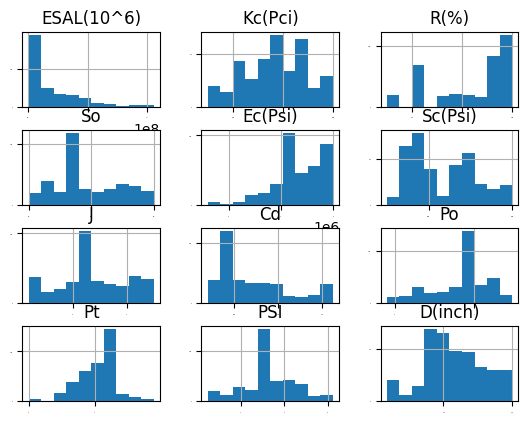

In [24]:
RigidData.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

In [25]:
# Visualize the dataset using histogram plots

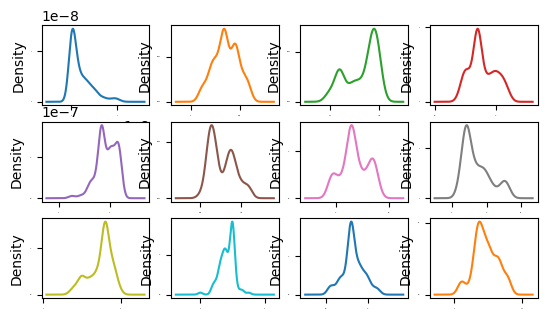

In [26]:
RigidData.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, legend = False, fontsize = 1)
plt.show()

In [27]:
# Visualize the dataset using box and whisker plots

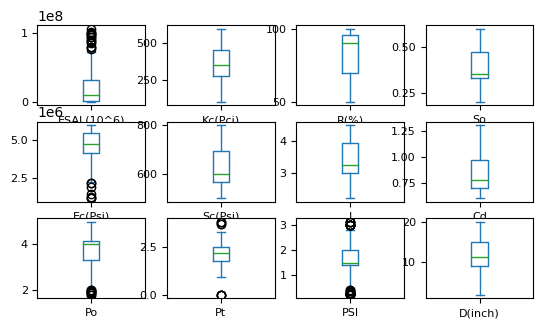

In [28]:
RigidData.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,fontsize = 8)
plt.show()

In [29]:
# Scatter plot matrix

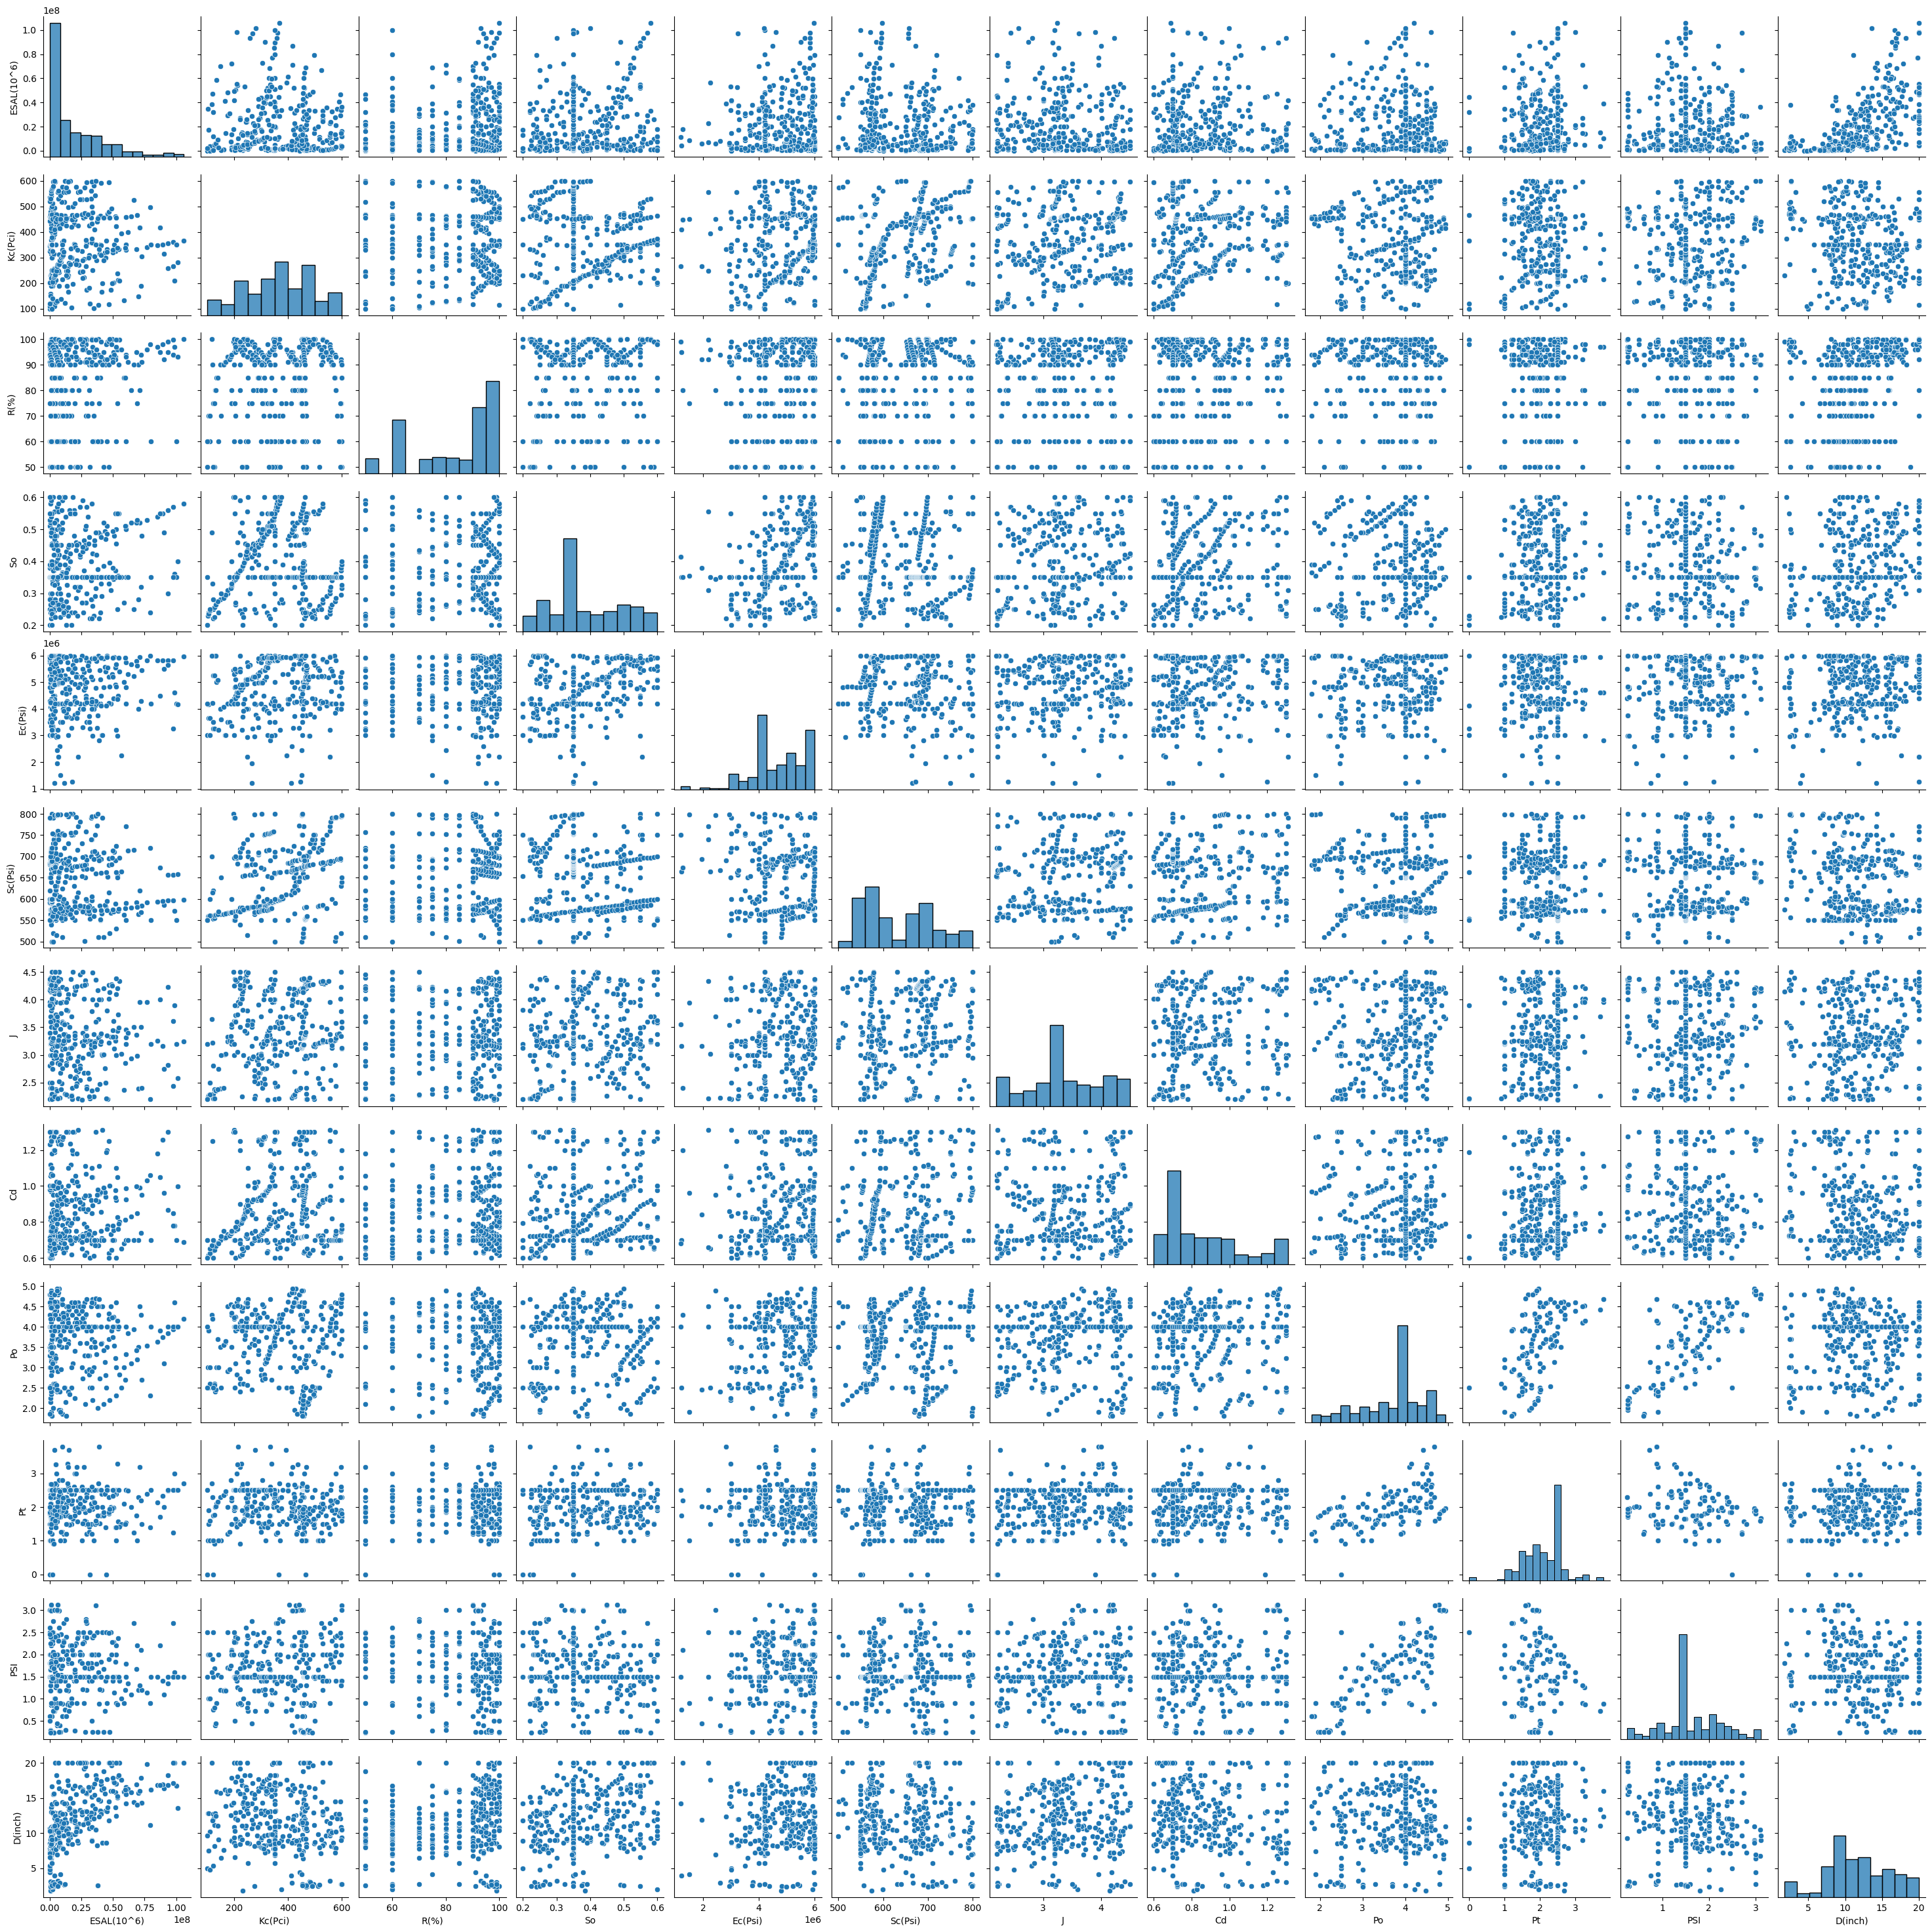

In [30]:
#plt.scatter(Rigiddata)
sns.pairplot(RigidData)
#plt.show()

In [31]:
# The Correlation between input parameters

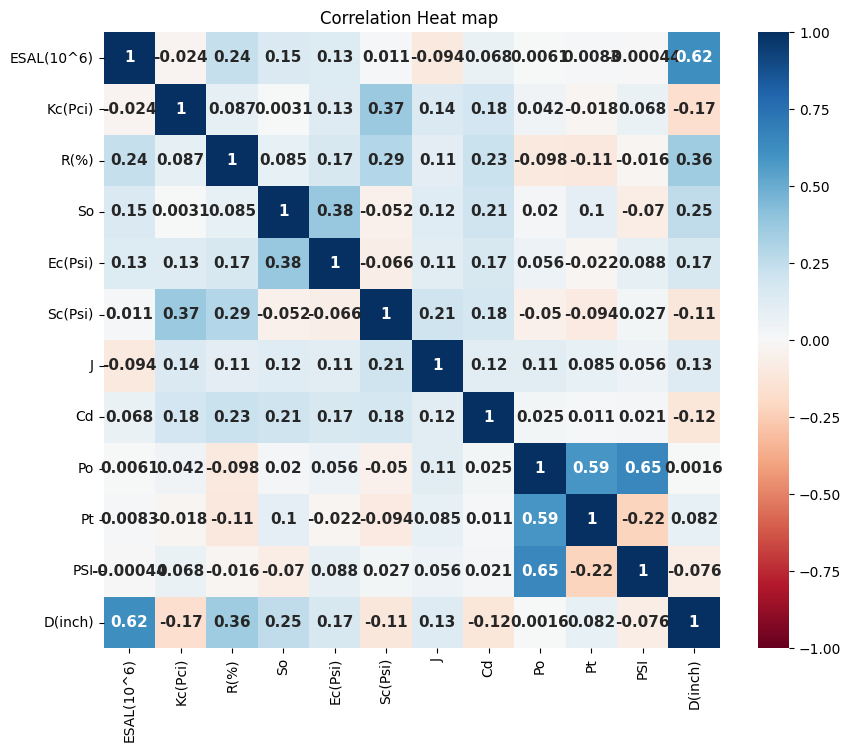

In [32]:
correlation = RigidData.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin = -1, vmax = 1, annot_kws = {'fontsize':11, 'fontweight':'bold'}, square = True)
plt.title("Correlation Heat map ")
plt.show()

In [33]:
# Removal of outliers using IQR method

In [34]:
# Outliers removal in ESAL

In [35]:
Q1 = RigidData['ESAL(10^6)'].quantile(0.25)
Q3 = RigidData['ESAL(10^6)'].quantile(0.75)
IQR = Q3 - Q1

In [36]:
IQR

29503500.0

In [37]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [38]:
print(upper_limit, lower_limit)

75758750.0 -42255250.0


In [39]:
# Removal of outliers using Capping method
# Capping - Change the outlier values to upper or lower limit values

In [40]:
newRigidData = RigidData.copy()

In [41]:
newRigidData.loc[(newRigidData['ESAL(10^6)'] >= upper_limit),'ESAL(10^6)'] = upper_limit
newRigidData.loc[(newRigidData['ESAL(10^6)'] <= lower_limit),'ESAL(10^6)'] = lower_limit

<Axes: ylabel='ESAL(10^6)'>

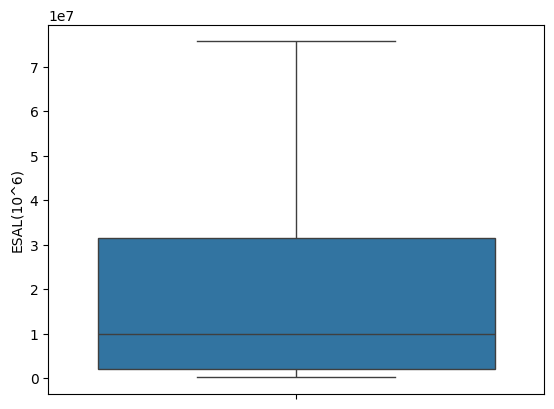

In [42]:
sns.boxplot(newRigidData['ESAL(10^6)'])

In [43]:
# Outliers removal in Ec(Psi)

In [44]:
Q1 = RigidData['Ec(Psi)'].quantile(0.25)
Q3 = RigidData['Ec(Psi)'].quantile(0.75)
IQR = Q3 - Q1

In [45]:
IQR

1300000.0

In [46]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [47]:
print(upper_limit, lower_limit)

7450000.0 2250000.0


In [48]:
# Removal of outliers using Capping method
# Capping - Change the outlier values to upper or lower limit values

In [49]:
newRigidData = RigidData.copy()

In [50]:
newRigidData.loc[(newRigidData['Ec(Psi)'] >= upper_limit),'Ec(Psi)'] = upper_limit
newRigidData.loc[(newRigidData['Ec(Psi)'] <= lower_limit),'Ec(Psi)'] = lower_limit

<Axes: ylabel='Ec(Psi)'>

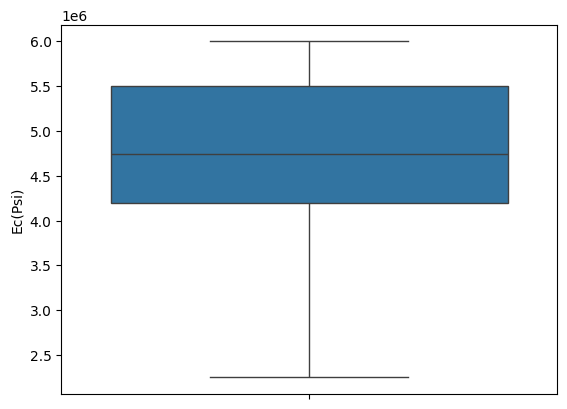

In [51]:
sns.boxplot(newRigidData['Ec(Psi)'])

In [52]:
# Outliers removal in Po

In [53]:
Q1 = RigidData['Po'].quantile(0.25)
Q3 = RigidData['Po'].quantile(0.75)
IQR = Q3 - Q1

In [54]:
IQR

0.8275000000000006

In [55]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [56]:
print(upper_limit, lower_limit)

5.368750000000001 2.058749999999999


In [57]:
# Removal of outliers using Capping method
# Capping - Change the outlier values to upper or lower limit values

In [58]:
newRigidData = RigidData.copy()

In [59]:
newRigidData.loc[(newRigidData['Po'] >= upper_limit),'Po'] = upper_limit
newRigidData.loc[(newRigidData['Po'] <= lower_limit),'Po'] = lower_limit

<Axes: ylabel='Po'>

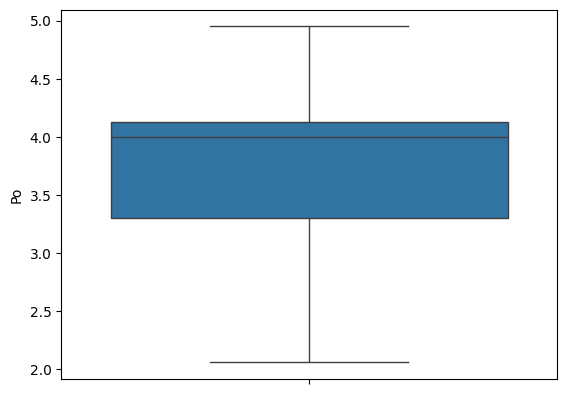

In [60]:
sns.boxplot(newRigidData['Po'])

In [61]:
# Outliers removal in Pt

In [62]:
Q1 = RigidData['Pt'].quantile(0.25)
Q3 = RigidData['Pt'].quantile(0.75)
IQR = Q3 - Q1

In [63]:
IQR

0.75

In [64]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [65]:
print(upper_limit, lower_limit)

3.625 0.625


In [66]:
# Removal of outliers using Capping method
# Capping - Change the outlier values to upper or lower limit values

In [67]:
newRigidData = RigidData.copy()

In [68]:
newRigidData.loc[(newRigidData['Pt'] >= upper_limit),'Pt'] = upper_limit
newRigidData.loc[(newRigidData['Pt'] <= lower_limit),'Pt'] = lower_limit

<Axes: ylabel='Pt'>

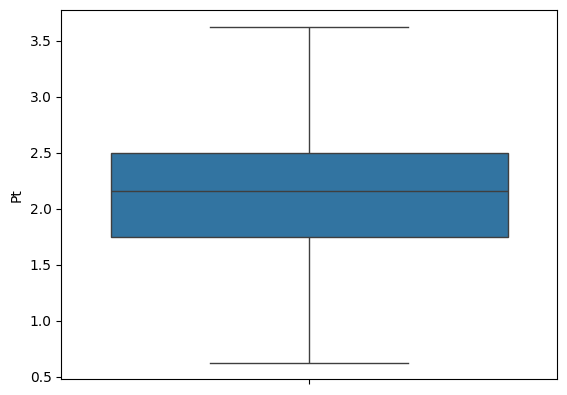

In [69]:
sns.boxplot(newRigidData['Pt'])

In [70]:
# Outliers removal in PSI

In [71]:
Q1 = RigidData['PSI'].quantile(0.25)
Q3 = RigidData['PSI'].quantile(0.75)
IQR = Q3 - Q1

In [72]:
IQR

0.6000000000000001

In [73]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [74]:
print(upper_limit, lower_limit)

2.9000000000000004 0.4999999999999998


In [75]:
# Removal of outliers using Capping method
# Capping - Change the outlier values to upper or lower limit values

In [76]:
newRigidData = RigidData.copy()

In [77]:
newRigidData.loc[(newRigidData['PSI'] >= upper_limit),'PSI'] = upper_limit
newRigidData.loc[(newRigidData['PSI'] <= lower_limit),'PSI'] = lower_limit

<Axes: ylabel='PSI'>

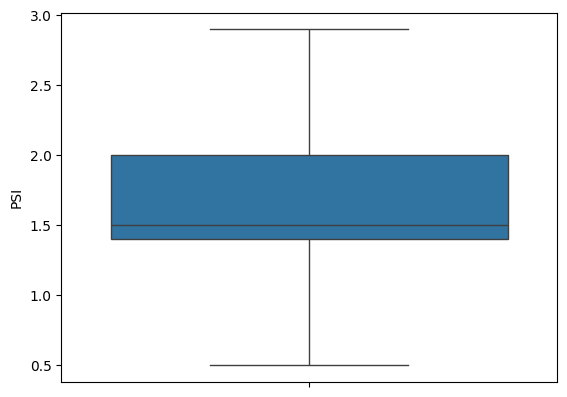

In [78]:
sns.boxplot(newRigidData['PSI'])

In [79]:
# Split the data into features and target variables(Thickness)

In [80]:
X = newRigidData.drop('D(inch)', axis = 1)
y = newRigidData['D(inch)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [81]:
print(X)

     ESAL(10^6)  Kc(Pci)  R(%)    So    Ec(Psi)  Sc(Psi)     J    Cd    Po  \
0    31934000.0    121.0  50.0  0.22  3250000.0    554.0  2.21  0.60  2.50   
1    34831000.0    102.0  60.0  0.23  4172356.0    559.0  2.25  0.61  3.00   
2    17415000.0    105.0  70.0  0.24  3658900.0    560.0  2.27  0.62  2.50   
3    11948000.0    122.0  75.0  0.25  5247000.0    561.0  2.30  0.64  2.50   
4     6155000.0    128.0  80.0  0.26  6000000.0    562.0  2.35  0.66  2.40   
..          ...      ...   ...   ...        ...      ...   ...   ...   ...   
359  10513000.0    310.0  70.0  0.26  3992583.0    595.0  3.21  1.27  4.35   
360  11214000.0    322.0  60.0  0.24  3921456.0    600.0  3.26  0.63  4.25   
361  21727000.0    329.0  50.0  0.23  3850000.0    715.0  2.89  0.82  3.95   
362  39250000.0    333.0  75.0  0.22  2819368.0    690.0  4.00  1.11  4.68   
363  53267000.0    338.0  75.0  0.55  2987546.0    650.0  4.21  1.05  4.15   

       Pt   PSI  
0    0.00  2.50  
1    1.00  2.00  
2    1.50

In [82]:
print(y)

0      11.99
1      12.78
2      12.84
3      12.76
4      12.82
       ...  
359     7.77
360    11.43
361     8.85
362    12.36
363    15.29
Name: D(inch), Length: 364, dtype: float64


In [83]:
# Standardize features by removing the mean and and scaling to unit variance

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Artificial Neural Network Regressor
# Define The Model
# Experiment with deeper and wider networks

In [86]:
model = Sequential()
model.add(Dense(128, input_dim = 11, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

In [87]:
# Output layer

In [88]:
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse', 'r2_score'])
model.summary()
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 146.7049 - mae: 11.3183 - val_loss: 126.2910 - val_mae: 10.4377
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 127.7200 - mae: 10.4212 - val_loss: 108.1513 - val_mae: 9.5379
Epoch 3/100
8/8 

In [89]:
# Plot the training and validation accuracy and loss at each epoch

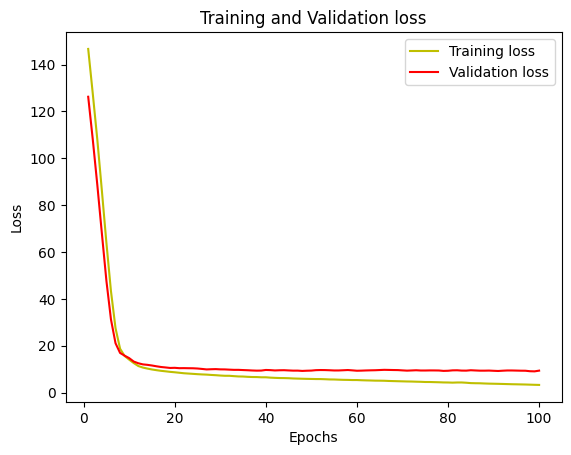

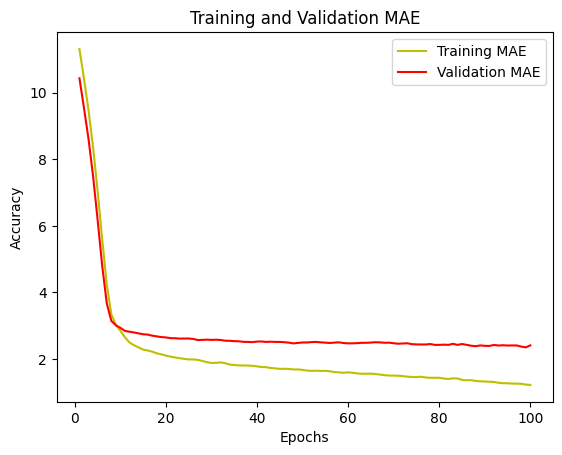

In [90]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label ='Training MAE')
plt.plot(epochs, val_acc, 'r', label ='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [91]:
# Predict on test data

In [92]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are:", predictions)
print("Real values are:", y_test[:5])

1/1 [==============================] - 0s 96ms/step
Predicted values are: [[19.56246  ]
 [17.148653 ]
 [12.925305 ]
 [16.536997 ]
 [15.9915285]]
Real values are: 10     17.88
14     19.20
276     8.49
362    12.36
129     8.66
Name: D(inch), dtype: float64


In [93]:
# Comparsion with other models
# Neural network from the current code

In [95]:
'''mse_neural, mae_neural, r2_score_neural= model.evaluate(X_test_scaled, y_test)
print("Mean squared error from neural network:", mse_neural)
print("Mean absolute error from neural network:", mae_neural)
print("r2_score from neural network:", r2_score_neural)'''
y_pred_neural = model.predict(X_test_scaled).flatten()
mae_neural = mean_absolute_error(y_test, y_pred_neural)
mse_neural = mean_squared_error(y_test, y_pred_neural)
r2_score_neural = r2_score(y_test, y_pred_neural)
print("Mean squared error from neural network:", mse_neural)
print("Mean absolute error from neural network:", mae_neural)
print("r2_score from neural network:", r2_score_neural)

3/3 [==============================] - 0s 4ms/step
Mean squared error from neural network: 12.021112238858668
Mean absolute error from neural network: 2.5468486255488982
r2_score from neural network: 0.38970271316078486


In [96]:
# Linear Regression

In [97]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pre_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pre_lr)
mae_lr = mean_absolute_error(y_test, y_pre_lr)
r2_score_lr = r2_score(y_test, y_pre_lr)
print("Mean squared error from linear regression:", mse_lr)
print("Mean absolute error from linear regression:", mae_lr)
print("r2_score from Linear regression:", r2_score_lr)

Mean squared error from linear regression: 8.259460182793172
Mean absolute error from linear regression: 1.8366743371090624
r2_score from Linear regression: 0.5806772251887911


In [ ]:
# Decision Tree Regressor

In [98]:
Dtr_model = DecisionTreeRegressor()
Dtr_model.fit(X_train_scaled, y_train)
y_pre_Dtr = Dtr_model.predict(X_test_scaled)
mse_Dtr = mean_squared_error(y_test, y_pre_Dtr)
mae_Dtr = mean_absolute_error(y_test, y_pre_Dtr)
r2_score_Dtr = r2_score(y_test, y_pre_Dtr)
print("Mean squared error from Decision Tree regression:", mse_Dtr)
print("Mean absolute error from Decsion Tree regression:", mae_Dtr)
print("r2_score from Decision Tree regression:", r2_score_Dtr)

Mean squared error from Decision Tree regression: 7.657736986301372
Mean absolute error from Decsion Tree regression: 1.8213698630136987
r2_score from Decision Tree regression: 0.6112259819885222


In [ ]:
# Random Forest Regressor

In [99]:
Rfr_model = RandomForestRegressor()
Rfr_model.fit(X_train_scaled, y_train)
y_pre_Rfr = Rfr_model.predict(X_test_scaled)
mse_Rfr = mean_squared_error(y_test, y_pre_Rfr)
mae_Rfr = mean_absolute_error(y_test, y_pre_Rfr)
r2_score_Rfr = r2_score(y_test, y_pre_Rfr)
print("Mean squared error from Random Forest regression:", mse_Rfr)
print("Mean absolute error from Random Forest regression:", mae_Rfr)
print("r2_score from Random Forest regression:", r2_score_Rfr)

Mean squared error from Random Forest regression: 5.6612296479589
Mean absolute error from Random Forest regression: 1.5718791780821917
r2_score from Random Forest regression: 0.712586237806305


In [ ]:
# Gradient Boosting Regression

In [100]:
Gbr_model = GradientBoostingRegressor()
Gbr_model.fit(X_train_scaled, y_train)
y_pre_Gbr = Gbr_model.predict(X_test_scaled)
mse_Gbr = mean_squared_error(y_test, y_pre_Gbr)
mae_Gbr = mean_absolute_error(y_test, y_pre_Gbr)
r2_score_Gbr = r2_score(y_test, y_pre_Gbr)
print("Mean squared error from Gradient Boosting regression:", mse_Gbr)
print("Mean absolute error from Gradient Boosting regression:", mae_Gbr)
print("r2_score from Gradient Boosting regression:", r2_score_Gbr)

Mean squared error from Gradient Boosting regression: 6.9454846212076005
Mean absolute error from Gradient Boosting regression: 1.5528569818930265
r2_score from Gradient Boosting regression: 0.6473861706070434
